<a href="https://colab.research.google.com/github/ale22toni/ISPC-Ciencia-de-Datos/blob/main/Examen_V2parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analizar y resolver
# Subir a repositorio de Github, con al menos un pull request, y devolver el link
Hacer un fork de este repositorio y trabajar sobre ese archivo
1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver.

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.

In [49]:
pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
import pandas as pd
import numpy as np
import utils

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_breast_cancer
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

*Para generar los datos usaremos las funciones provistas en sklearn*
sklearn.datasets: Datasets

In [66]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
(1797, 64)


(1797, 64)


(1797, 64)

In [67]:
digits.keys()

datos = pd.DataFrame(digits.data, columns=[digits.feature_names])
datos.describe()


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [70]:
datos = datos.assign(target=pd.Series (digits.target))

datos.replace(to_replace={'target': {0: digits.target_names[0]}}, inplace=True)
datos.replace(to_replace={'target': {1: digits.target_names[1]}}, inplace=True)

datos.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2


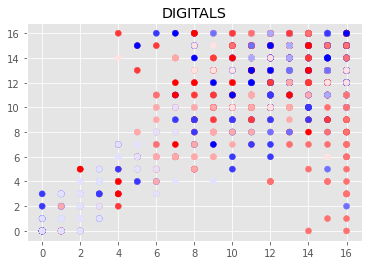

In [76]:
#Vizualizacion de la tres clases segun dos variables predictoras
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos.pixel_0_3, datos.pixel_7_3, c=datos.target);
ax.set_title("DIGITALS");

In [77]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns = 'target')
y = datos['target']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [78]:
X_train.shape


(1437, 64)

In [79]:
X_test.shape


(360, 64)

In [80]:
#Busqueda en grilla de los mejores valores de los siguientes hiperparametros para SVM:
grilla_hiperparametros = {
    'support vector machine':{
        'model':SVC(),
        'params':{
            'C':[1, 0.75, 0.5, 0.25],
            'kernel':['linear']
        }
    }
}

score=[]

for model_name, mp in grilla_hiperparametros.items():

    clf = GridSearchCV(mp['model'],mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train, y_train)

    score.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [81]:
#Verificamos cual de los valores de los hiperparametros dio el mejor resultado
pd.DataFrame(score,columns=['model','best_score','best_params'])

,model,best_score,best_params
0,support vector machine,0.970077,"{'C': 1, 'kernel': 'linear'}"


In [82]:
datos.columns

MultiIndex([('pixel_0_0',),
            ('pixel_0_1',),
            ('pixel_0_2',),
            ('pixel_0_3',),
            ('pixel_0_4',),
            ('pixel_0_5',),
            ('pixel_0_6',),
            ('pixel_0_7',),
            ('pixel_1_0',),
            ('pixel_1_1',),
            ('pixel_1_2',),
            ('pixel_1_3',),
            ('pixel_1_4',),
            ('pixel_1_5',),
            ('pixel_1_6',),
            ('pixel_1_7',),
            ('pixel_2_0',),
            ('pixel_2_1',),
            ('pixel_2_2',),
            ('pixel_2_3',),
            ('pixel_2_4',),
            ('pixel_2_5',),
            ('pixel_2_6',),
            ('pixel_2_7',),
            ('pixel_3_0',),
            ('pixel_3_1',),
            ('pixel_3_2',),
            ('pixel_3_3',),
            ('pixel_3_4',),
            ('pixel_3_5',),
            ('pixel_3_6',),
            ('pixel_3_7',),
            ('pixel_4_0',),
            ('pixel_4_1',),
            ('pixel_4_2',),
            ('pixel_

In [84]:
# Creación del modelo SVM lineal
# ==============================================================================
modelo = SVC(C =100, kernel = 'linear', random_state=123)

#Entreno el modelo
modelo.fit(X_train, y_train) 

SVC(C=100, kernel='linear', random_state=123)

In [86]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(X_train['pixel_3_3']), np.max(X_train['pixel_7_6']), 50)
y = np.linspace(np.min(X_train['pixel_3_3']), np.max(X_train['pixel_7_6']), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

In [88]:
# Predicciones test
# ==============================================================================

predicciones = modelo.predict(X_test)
predicciones

array([7, 1, 7, 6, 0, 2, 4, 3, 6, 3, 7, 8, 7, 9, 4, 3, 8, 7, 8, 4, 0, 3,
       9, 1, 3, 6, 6, 0, 5, 4, 1, 8, 1, 2, 3, 2, 7, 6, 1, 8, 6, 4, 4, 0,
       9, 2, 8, 5, 4, 4, 4, 1, 7, 6, 8, 2, 9, 9, 9, 0, 8, 3, 1, 8, 8, 1,
       3, 9, 1, 3, 9, 6, 9, 5, 2, 1, 9, 2, 1, 3, 8, 7, 3, 3, 8, 7, 7, 5,
       8, 2, 6, 1, 9, 1, 6, 4, 5, 2, 2, 4, 5, 4, 7, 6, 5, 9, 2, 4, 1, 0,
       7, 6, 1, 2, 9, 5, 2, 5, 0, 3, 2, 7, 6, 4, 8, 2, 1, 1, 6, 4, 6, 2,
       5, 4, 7, 5, 0, 9, 1, 0, 5, 6, 7, 6, 3, 8, 3, 2, 0, 4, 4, 1, 5, 4,
       6, 1, 1, 1, 6, 1, 7, 9, 0, 7, 9, 5, 4, 1, 3, 8, 6, 4, 7, 1, 5, 7,
       4, 7, 4, 3, 2, 2, 1, 1, 4, 4, 3, 5, 5, 9, 4, 5, 5, 9, 3, 9, 3, 1,
       2, 0, 8, 2, 4, 5, 2, 4, 6, 8, 3, 9, 1, 0, 8, 1, 8, 5, 6, 8, 7, 1,
       8, 3, 4, 9, 7, 0, 5, 5, 6, 1, 3, 0, 5, 8, 2, 0, 9, 8, 6, 7, 8, 4,
       1, 0, 5, 2, 5, 1, 6, 4, 7, 1, 2, 6, 4, 4, 6, 3, 2, 3, 2, 6, 5, 2,
       9, 4, 7, 0, 1, 0, 4, 3, 1, 2, 7, 9, 8, 5, 9, 5, 7, 0, 4, 8, 4, 9,
       4, 0, 7, 7, 2, 5, 3, 5, 3, 9, 7, 5, 5, 2, 7,

In [90]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 99.16666666666667%


In [98]:
from sklearn import datasets
import numpy as np

digits = datasets.load_digits()
rng = np.random.RandomState(2)
indices = np.arange(len(digits.data))
rng.shuffle(indices)

In [99]:
X = digits.data[indices[:340]]
y = digits.target[indices[:340]]
images = digits.images[indices[:340]]

n_total_samples = len(y)
n_labeled_points = 40

indices = np.arange(n_total_samples)

unlabeled_set = indices[n_labeled_points:]

In [100]:
y_train = np.copy(y)
y_train[unlabeled_set] = -1

In [101]:
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import classification_report

lp_model = LabelSpreading(gamma=0.25, max_iter=20)
lp_model.fit(X, y_train)
predicted_labels = lp_model.transduction_[unlabeled_set]
true_labels = y[unlabeled_set]

print(
    "Label Spreading model: %d labeled & %d unlabeled points (%d total)"
    % (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples)
)


Label Spreading model: 40 labeled & 300 unlabeled points (340 total)


In [102]:
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.82      1.00      0.90        37
           2       1.00      0.86      0.92        28
           3       1.00      0.80      0.89        35
           4       0.92      1.00      0.96        24
           5       0.74      0.94      0.83        34
           6       0.89      0.96      0.92        25
           7       0.94      0.89      0.91        35
           8       1.00      0.68      0.81        31
           9       0.81      0.88      0.84        24

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300



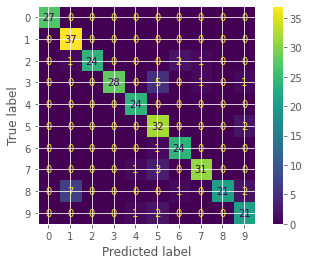

In [103]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    true_labels, predicted_labels, labels=lp_model.classes_
)

In [104]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix #fuera de uso
from sklearn.metrics import ConfusionMatrixDisplay #hay que usar esta

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


In [105]:
# Datos
# ==============================================================================
datos_RL = datos
datos_RL

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [106]:
#Dividimos los datos
X = datos_RL.drop(columns = 'target')
y = datos_RL['target']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state=42)


In [107]:
X_train.shape

(1437, 64)

In [108]:
X_test.shape

(360, 64)

In [109]:
#Normalizamos el dataset
min_max_scaler = preprocessing.MinMaxScaler()
X_train_normalizado = min_max_scaler.fit_transform(X_train)
X_test_normalizado = min_max_scaler.fit_transform(X_test)


In [110]:
X_train_normalizado

array([[0.    , 0.    , 0.1875, ..., 0.8125, 0.25  , 0.    ],
       [0.    , 0.    , 0.5625, ..., 0.1875, 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.375 , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.5625, ..., 1.    , 0.125 , 0.    ],
       [0.    , 0.    , 0.0625, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.0625, ..., 0.0625, 0.    , 0.    ]])

In [111]:
#Entrenamos el modelo
reglog=LogisticRegression()

reglog.max_iter=100
reglog.fit(X_train_normalizado, y_train)

LogisticRegression()

In [112]:
#Hacemos la predicción sobre los datos de testeo
predict = reglog.predict(X_test_normalizado)
predict

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 9, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [113]:
#Verificamos que tan acertada fue la respuesta del modelo
accuracy_RL = accuracy_score(y_test, predict)
accuracy_RL
print("")
print(f"El accuracy de test es: {100*accuracy_RL}%")


El accuracy de test es: 96.94444444444444%


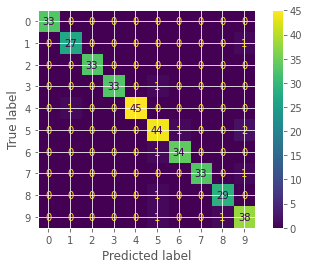

In [114]:
#Imprimimos la matriz de confusión
ConfusionMatrixDisplay.from_predictions(
   y_test, predict)

plt.show()